In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
RawData = "rawdata/2.data"
f = open(RawData, "r")
a = np.fromfile(f, dtype=np.uint32)
t = a[-1]
V = a[:-1].copy()
T = [ (( x * t ) / ( 1000.0*len(V) )) for x in 2*range(len(V))]
Fech = 10000.0/t*10e2 # in MHz

In [3]:
#ADC1_pins = [21,22,19,15,13,11,12,10, 8]
ADC1_pins = [21,22,19,15,13,11,12,10, 8]
ADC2_pins = [38,37,36,35,33,32,26,24,23]

#ADC1_GPIO = [9, 25,10,22,27,17,18,15,14]
ADC1_GPIO =  [9 ,25,10,22,27,17,18,15,14]

ADC2_GPIO = [20,26,16,19,13,12, 7, 8,11]

ADC1len = len(ADC1_GPIO)
ADC2len = len(ADC2_GPIO)


def GetV2(Volts):
    Signal = []
    Map = np.zeros((len(V),ADC2len), dtype=np.int)
    for i in range(len(Volts)):
        val = int(V[i])
        SignalZero = 0
        for k in range(ADC2len):
            Map[i][k] = (val & 2**k)/2**k
        for k in range(ADC2len):
            SignalZero += 2**k*((val & 2**ADC2_GPIO[k])/2**ADC2_GPIO[k])
        Signal.append(SignalZero)

            
    return Signal,Map



def GetV1(Volts):
    Signal = []
    Map = np.zeros((len(V),ADC1len), dtype=np.int)
    for i in range(len(Volts)):
        val = int(V[i])
        SignalZero = 0
        for k in range(ADC1len):
            Map[i][k] = (val & 2**k)/2**k
        for k in range(ADC1len):
            SignalZero += 2**k*((val & 2**ADC1_GPIO[k])/2**ADC1_GPIO[k])
        Signal.append(SignalZero)

            
    return Signal,Map

In [4]:
M = GetV2(V)[0]
M2 = GetV1(V)[0]
Ma = M - np.average(M[5000:7000])
Mb = M2 - np.average(M2[5000:7000])

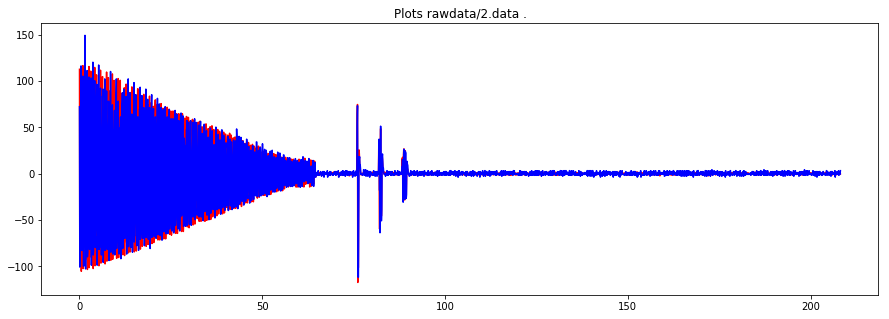

In [5]:
plt.figure(figsize=(15,5))
plt.plot(T[0:2500],Ma[0:2500],"r")
plt.plot(T[0:2500],Mb[0:2500],"b")
plt.title("Plots "+RawData+' .') 
plt.savefig('twoADCs'+RawData.split("/")[-1]+'.png', bbox_inches='tight')
plt.show()

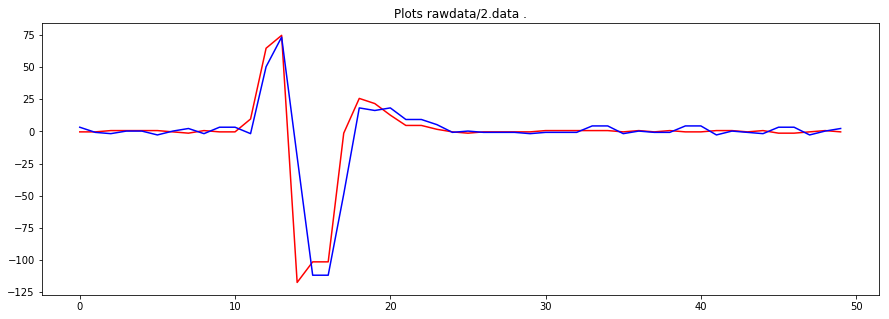

In [6]:
plt.figure(figsize=(15,5))
plt.plot(Ma[900:950],"r")
plt.plot(Mb[900:950],"b")
plt.title("Plots "+RawData+' .') 
plt.savefig('Raw signal '+RawData.split("/")[-1]+'.png', bbox_inches='tight')
plt.show()

In [7]:
rawSig = []
for k in range(len(Ma)):
    rawSig.append(Mb[k])
    rawSig.append(Ma[k])

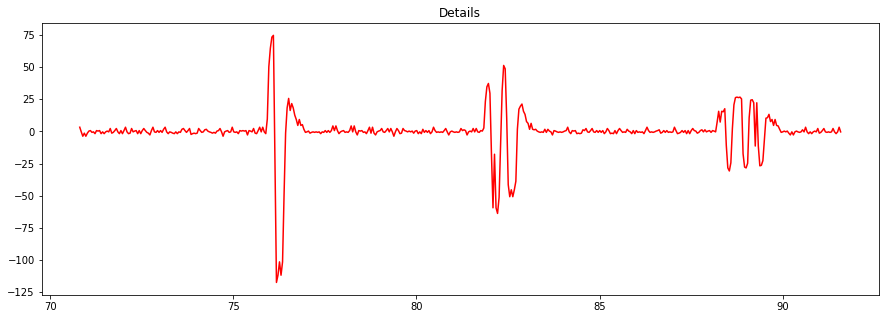

In [8]:
plt.figure(figsize=(15,5))
TT = np.divide(T,2.0)
plt.plot(TT[1700:2200],rawSig[1700:2200],"r")
plt.title("Details")  
plt.show()

In [9]:
FFT = abs(np.fft.fft(rawSig))
Scale = max(FFT)
ff = [ Fech*2.0*x/(2*len(V)) for x in range(len(V))]

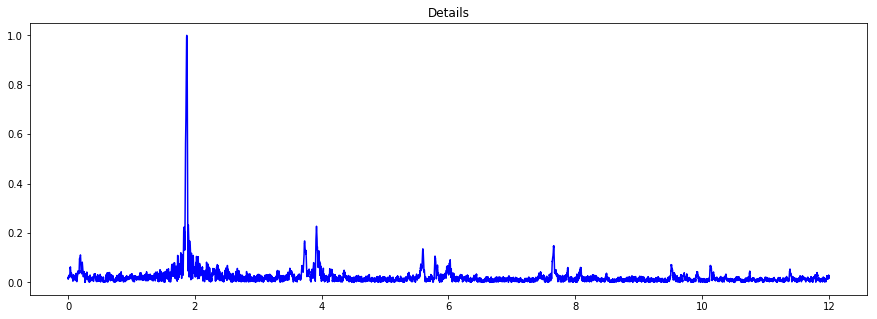

In [10]:
plt.figure(figsize=(15,5))
plt.plot(ff,FFT[0:len(FFT)/2]/Scale,"b")
plt.title("Details")  
plt.show()

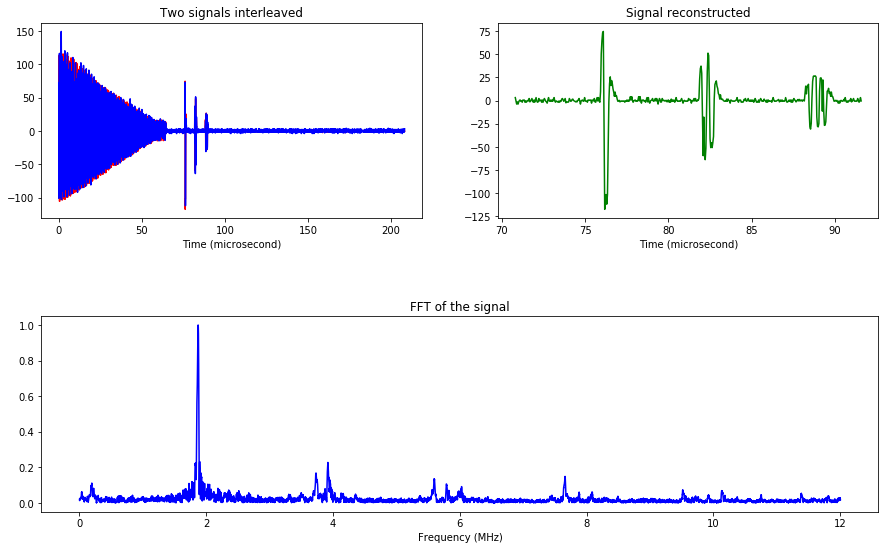

In [11]:
plt.figure(figsize=(15,9))
plt.subplots_adjust(hspace=.5)
plt.subplot(221)
plt.plot(T[0:2500],Ma[0:2500],"r")
plt.plot(T[0:2500],Mb[0:2500],"b")
plt.title("Two signals interleaved")
plt.xlabel("Time (microsecond)")
plt.subplot(222)
plt.plot(TT[1700:2200],rawSig[1700:2200],"g")
plt.title("Signal reconstructed")
plt.xlabel("Time (microsecond)")
plt.subplot(212)
plt.plot(ff,FFT[0:len(FFT)/2]/Scale,"b")
plt.title("FFT of the signal")  
plt.xlabel("Frequency (MHz)")
plt.savefig("twoadcs.jpg",  bbox_inches='tight')
plt.show()